In [380]:
import os
import time
import rasterio
import pickle
import glob
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import datetime as dt
import rioxarray as rxr
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from pandas import date_range, to_datetime
import dask
import dask.dataframe as dd
import matplotlib.dates as mdates
import logging
import dask.array as da
from joblib import Parallel, delayed
from dask import config as dask_config
from dask.diagnostics import ProgressBar
import warnings
import subprocess
from xclim.indices import standardized_precipitation_index as spi
from scipy.stats import pearsonr

In [3]:
output_dir = '../../../datasets/validation_datasets/precip/test_error'
index_output = '../../../datasets/validation_datasets/index-spi'
spi_files = '../../../datasets/validation_datasets/precip/test_error/other_zones'

In [278]:
y_full = np.arange(-12.0, 25.0, 0.25)
x_full = np.arange(21.5, 51.5, 0.25)

#### 1-month

In [236]:
ts_30_file = glob.glob("../drought_index/index_netcdf/ghdi_*_30.nc")
ts_30_file.sort()

In [215]:
# Monthly Output using X
spi_1 = glob.glob('../../../datasets/validation_datasets/precip/test_error/other_zones/subregion_*.nc_1.nc')
spi_1m = [xr.open_dataset(file)["__xarray_dataarray_variable__"].rename('spi_1') for file in np.sort(spi_1)]

In [250]:
# Load all datasets and resample to monthly
datasets = [xr.open_dataset(file)['ghdi_30'].resample(time='MS').mean(dim='time') for file in ts_30_file]

In [280]:
ghdi1_list = [ds.interp(y=y_full, x=x_full, method="nearest")
             for ds in datasets]

In [290]:
spi1_list = [ds.interp(lat=y_full, lon=x_full, method="nearest").clip(min=-3, max=3)
             for ds in spi_1m]

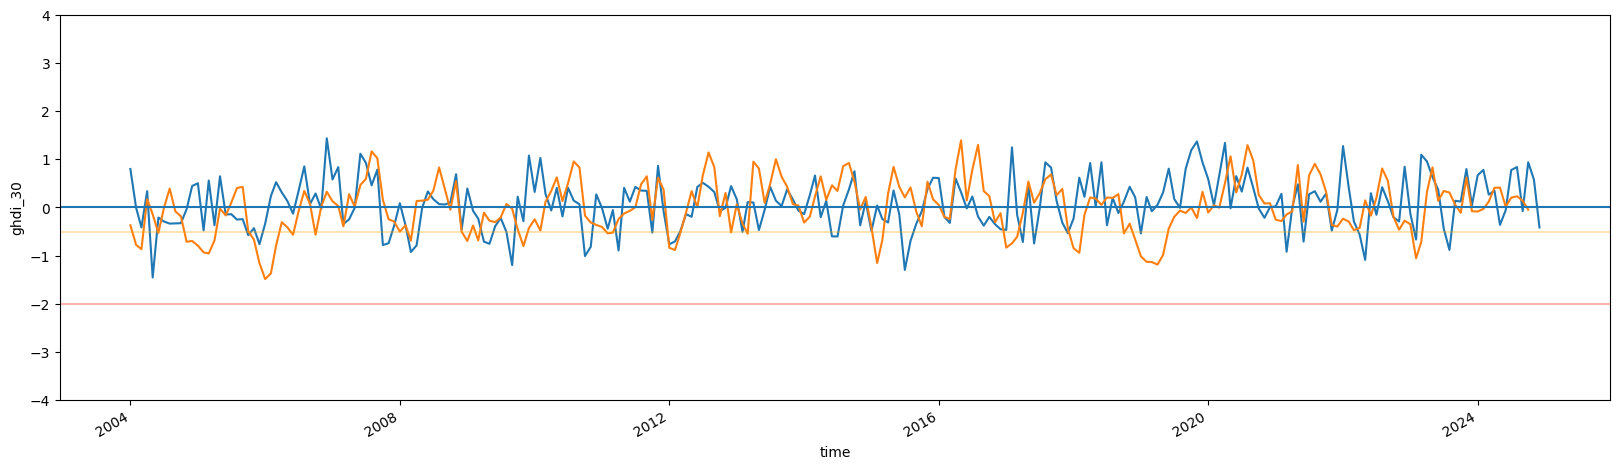

In [295]:
plt.figure(figsize=(20, 5))
spi1_list[8].mean(dim=['lat', 'lon']).plot()
ghdi1_list[8].mean(dim=['y', 'x']).plot()
plt.ylim(-4, 4)
plt.axhline(0)
plt.axhline(-0.5, color='orange', alpha=0.3)
plt.axhline(-2, color='red', alpha=0.3)

#### 3-month

In [300]:
spi_3 = glob.glob('../../../datasets/validation_datasets/precip/test_error/other_zones/subregion_*.nc_3.nc')
spi_3m = [xr.open_dataset(file)["__xarray_dataarray_variable__"].rename('spi_3') for file in np.sort(spi_3)]

In [298]:
ts_3_file = glob.glob("../drought_index/index_netcdf/ghdi_*_90.nc")
ts_3_file.sort()

In [316]:
# Load all datasets and resample to monthly
datasets = [xr.open_dataset(file)['ghdi_90'].resample(time='MS').mean(dim='time') for file in ts_3_file]

In [317]:
ghdi3_list = [ds.interp(y=y_full, x=x_full, method="nearest")
             for ds in datasets]

In [307]:
spi3_list = [ds.interp(lat=y_full, lon=x_full, method="nearest").clip(min=-3, max=3)
             for ds in spi_3m]

In [310]:

if 'y' in ghdi3_list[5].coords and 'x' in ghdi3_list[5].coords:
    lat_resolution = ghdi3_list[5].y.diff('y').mean().item()
    lon_resolution = ghdi3_list[5].x.diff('x').mean().item()
    print(f"Latitude resolution: {lat_resolution} degrees")
    print(f"Longitude resolution: {lon_resolution} degrees")

Latitude resolution: 0.25 degrees
Longitude resolution: 0.25 degrees


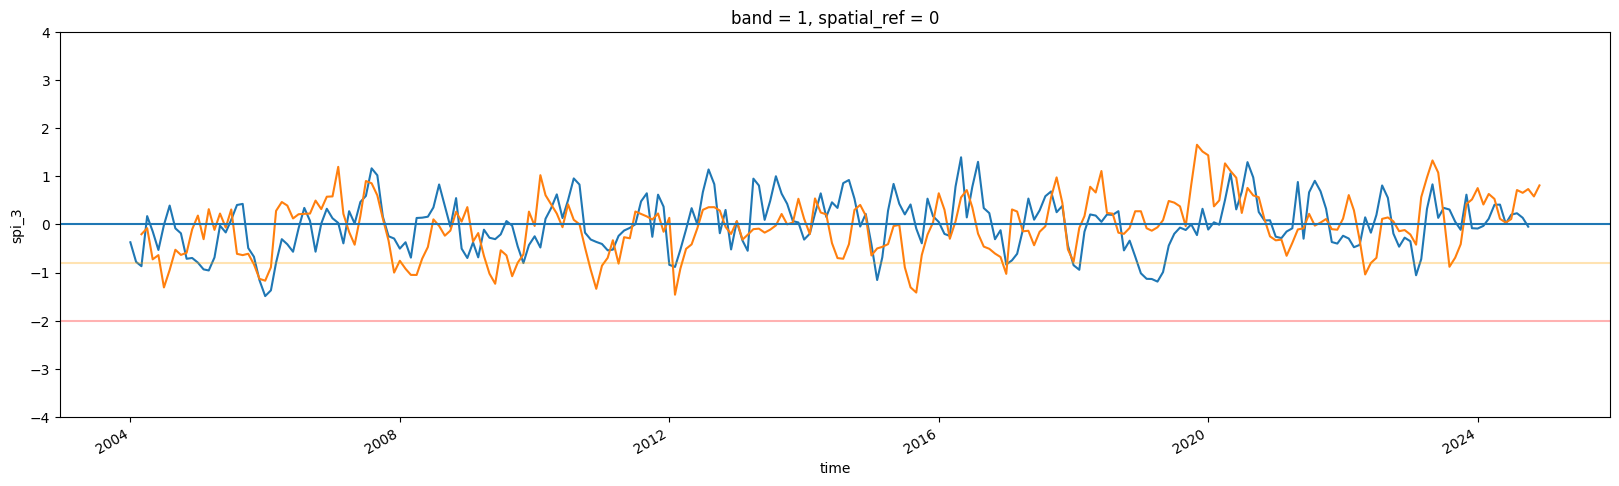

In [314]:
plt.figure(figsize=(20, 5))
ghdi3_list[8].mean(dim=['y', 'x']).plot()
spi3_list[8].mean(dim=['lat', 'lon']).plot()
plt.ylim(-4, 4)
plt.axhline(0)
plt.axhline(-0.8, color='orange', alpha=0.3)
plt.axhline(-2, color='red', alpha=0.3)

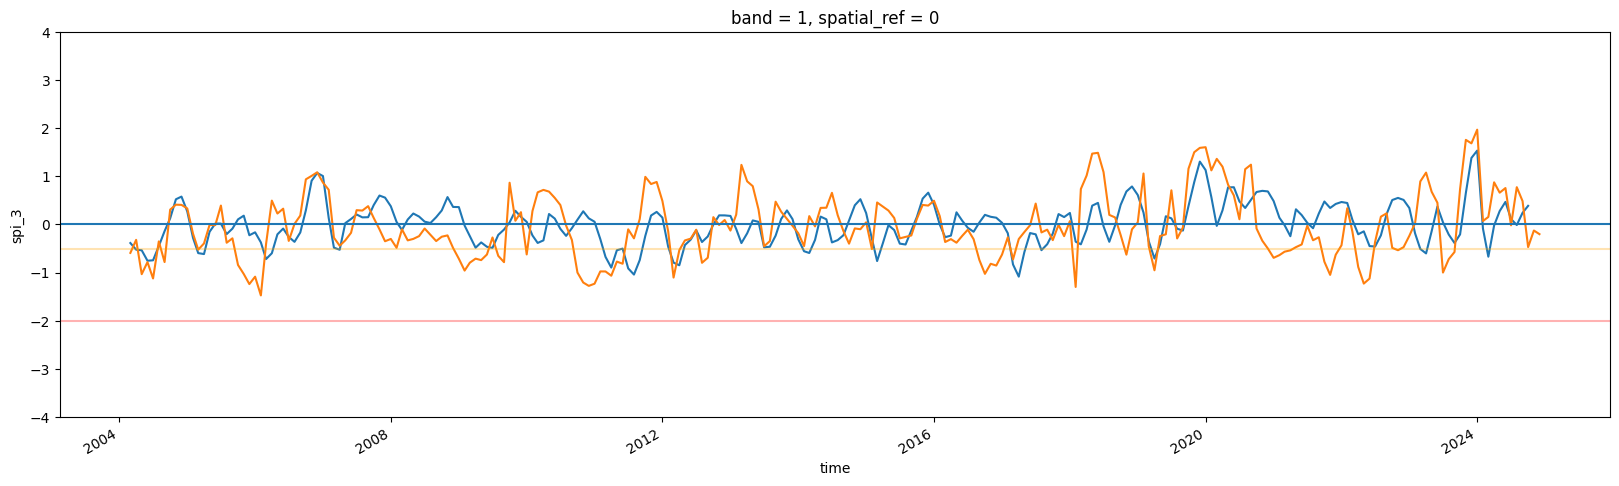

In [321]:
plt.figure(figsize=(20, 5))
ghdi3_list[0].mean(dim=['y', 'x']).plot()
spi3_list[0].mean(dim=['lat', 'lon']).plot()
plt.ylim(-4, 4)
plt.axhline(0)
plt.axhline(-0.5, color='orange', alpha=0.3)
plt.axhline(-2, color='red', alpha=0.3)

#### 6-month

In [344]:
spi_6

['../../../datasets/validation_datasets/precip/test_error/other_zones/subregion_9.nc_6.nc',
 '../../../datasets/validation_datasets/precip/test_error/other_zones/subregion_5.nc_6.nc',
 '../../../datasets/validation_datasets/precip/test_error/other_zones/subregion_1.nc_6.nc',
 '../../../datasets/validation_datasets/precip/test_error/other_zones/subregion_4.nc_6.nc',
 '../../../datasets/validation_datasets/precip/test_error/other_zones/subregion_8.nc_6.nc',
 '../../../datasets/validation_datasets/precip/test_error/other_zones/subregion_6.nc_6.nc',
 '../../../datasets/validation_datasets/precip/test_error/other_zones/subregion_2.nc_6.nc',
 '../../../datasets/validation_datasets/precip/test_error/other_zones/subregion_7.nc_6.nc',
 '../../../datasets/validation_datasets/precip/test_error/other_zones/subregion_3.nc_6.nc']

In [322]:
spi_6 = glob.glob('../../../datasets/validation_datasets/precip/test_error/other_zones/subregion_*.nc_6.nc')
spi_6m = [xr.open_dataset(file)["__xarray_dataarray_variable__"].rename('spi_6') for file in np.sort(spi_6)]

In [323]:
ts_6_file = glob.glob("../drought_index/index_netcdf/ghdi_*_180.nc")
ts_6_file.sort()

In [325]:
# Load all datasets and resample to monthly
datasets = [xr.open_dataset(file)['ghdi_180'].resample(time='MS').mean(dim='time') for file in ts_6_file]

In [331]:
# Resampling the indices to match spatially

# GHDI
ghdi6_list = [ds.interp(y=y_full, x=x_full, method="nearest")
             for ds in datasets]

# SPI
spi6_list = [ds.interp(lat=y_full, lon=x_full, method="nearest").clip(min=-3, max=3)
             for ds in spi_6m]

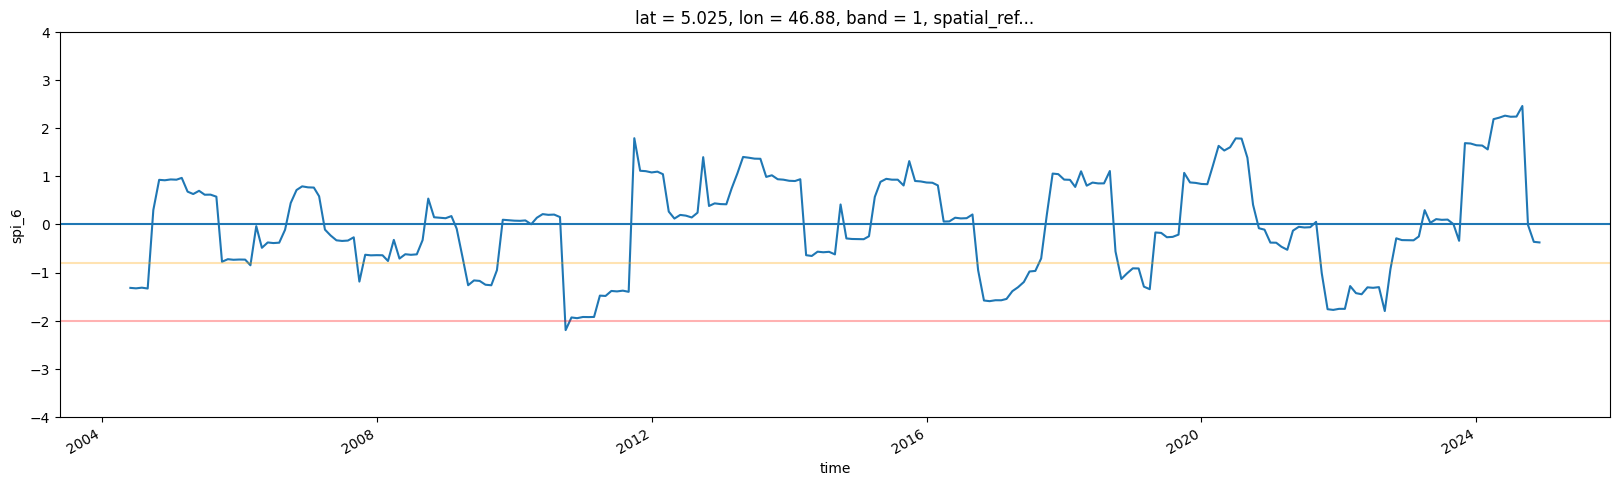

In [10]:
plt.figure(figsize=(20, 5))
combined_spi6.sel(lat=5, lon=47, method='nearest').interpolate_na(dim='time', method='linear').plot()
plt.ylim(-4, 4)
plt.axhline(0)
plt.axhline(-0.8, color='orange', alpha=0.3)
plt.axhline(-2, color='red', alpha=0.3)

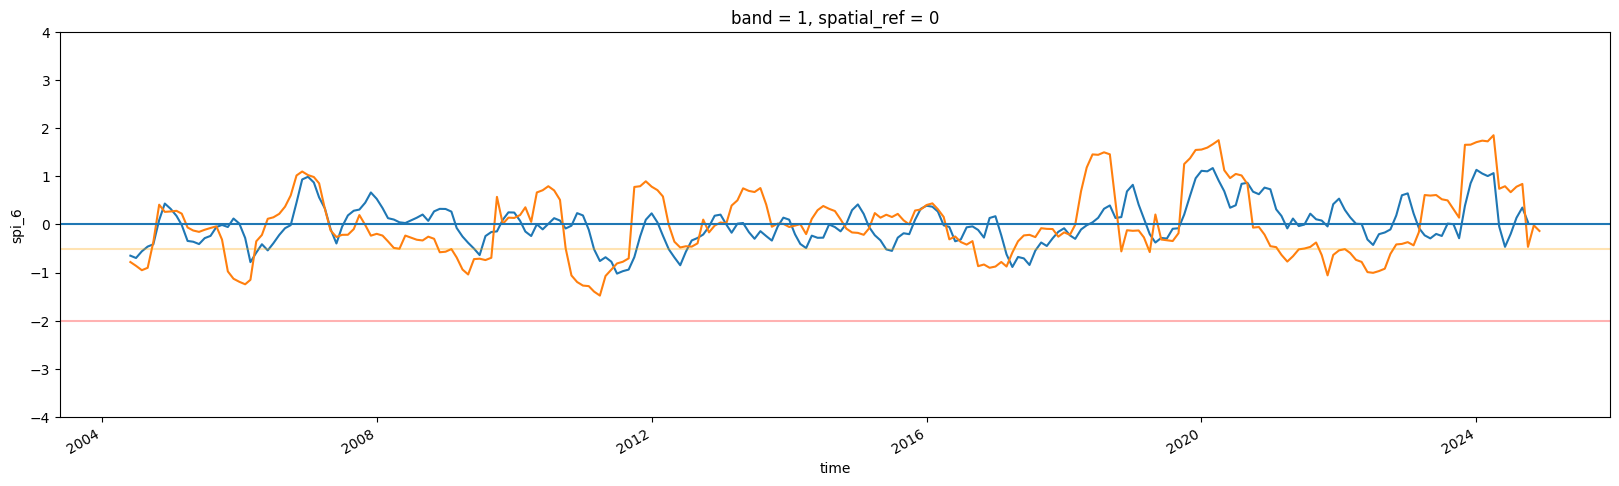

In [338]:
plt.figure(figsize=(20, 5))
ghdi6_list[0].mean(dim=['y', 'x']).plot()
spi6_list[0].mean(dim=['lat', 'lon']).plot()
plt.ylim(-4, 4)
plt.axhline(0)
plt.axhline(-0.5, color='orange', alpha=0.3)
plt.axhline(-2, color='red', alpha=0.3)

In [350]:
spi_12 = glob.glob('../../../datasets/validation_datasets/precip/test_error/other_zones/subregion_*.nc_12.nc')
spi_12m = [xr.open_dataset(file)["__xarray_dataarray_variable__"].rename('spi_12') for file in np.sort(spi_12)]

In [358]:
ts_12_file = glob.glob("../drought_index/index_netcdf/ghdi_*_360.nc")
ts_12_file.sort()

In [360]:
# Load all datasets and resample to monthly
datasets = [xr.open_dataset(file)['ghdi_360'].resample(time='MS').mean(dim='time') for file in ts_12_file]

In [361]:
# Resampling the indices to match spatially

# GHDI
ghdi12_list = [ds.interp(y=y_full, x=x_full, method="nearest")
             for ds in datasets]

# SPI
spi12_list = [ds.interp(lat=y_full, lon=x_full, method="nearest").clip(min=-3, max=3)
             for ds in spi_12m]

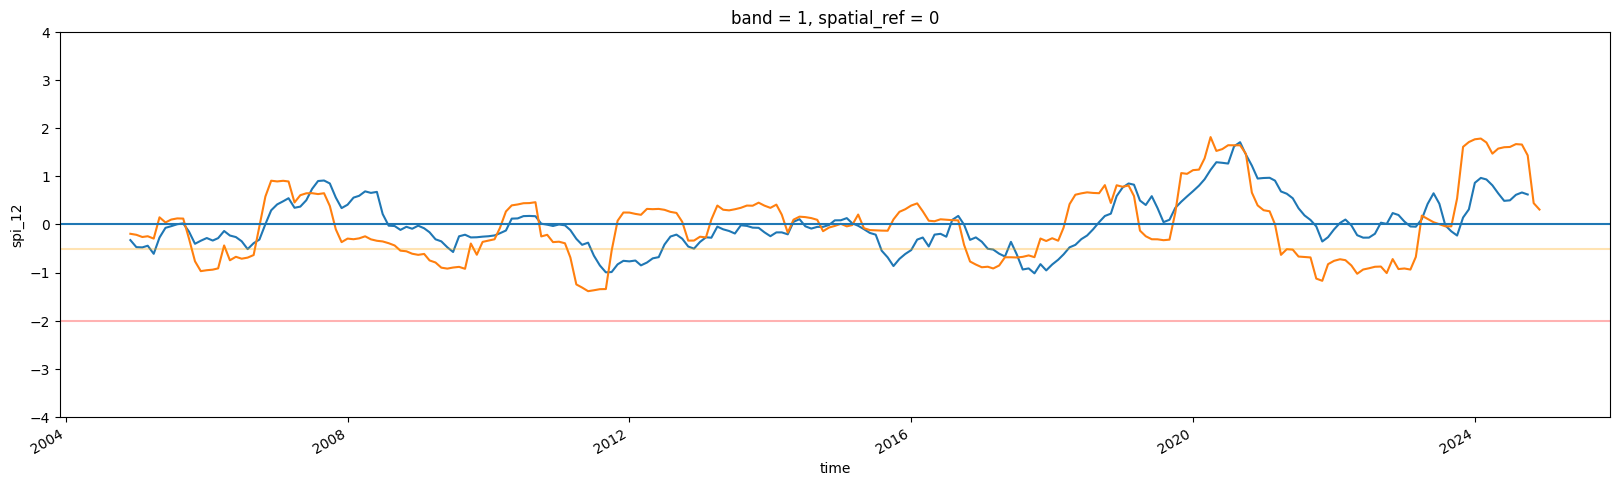

In [362]:
plt.figure(figsize=(20, 5))
ghdi12_list[0].mean(dim=['y', 'x']).plot()
spi12_list[0].mean(dim=['lat', 'lon']).plot()
plt.ylim(-4, 4)
plt.axhline(0)
plt.axhline(-0.5, color='orange', alpha=0.3)
plt.axhline(-2, color='red', alpha=0.3)

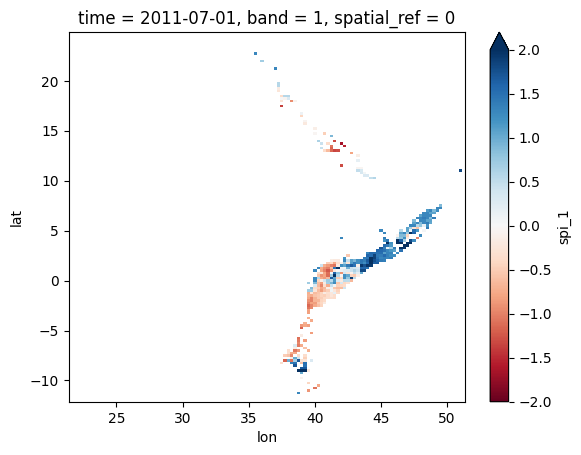

In [449]:
spi1_list[0].sel(time='2011-07-01').plot(vmin=-2, cmap='RdBu')

In [421]:
one_month = {
    # All zones for 3-month timescale
    'ghdi': ghdi1_list,
    'spi' : spi1_list
}

three_month = {
    # All zones for 3-month timescale
    'ghdi': ghdi3_list,
    'spi' : spi3_list
}

six_month = {
    # All zones for 6-month timescale
    'ghdi': ghdi6_list,
    'spi' : spi6_list
}

twe_month = {
    # All zones for 12-month timescale
    'ghdi': ghdi12_list,
    'spi' : spi12_list
}

In [411]:
def scatter_spatial_avg(ghdi_da, spi_da, ghdi_dims=('y', 'x'), spi_dims=('lat', 'lon'), zone='zone', timescale='3'):
    # Compute spatial means
    ghdi_mean = ghdi_da.mean(dim=ghdi_dims)
    spi_mean = spi_da.mean(dim=spi_dims)

    # Convert to Series and align time to month-end
    ghdi_series = ghdi_mean.to_series()
    spi_series = spi_mean.to_series()

    # Align time indices
    joined = pd.concat([ghdi_series, spi_series], axis=1, join='inner').dropna()
    joined.columns = ['GHDI', 'SPI']

    # Compute correlation
    corr, _ = pearsonr(joined['GHDI'], joined['SPI'])
    rmse = np.sqrt(np.mean((joined['GHDI'] - joined['SPI'])**2))
    bias = np.mean(joined['GHDI'] - joined['SPI'])

    # Scatter plot
    plt.figure(figsize=(6, 4))
    plt.scatter(joined['SPI'], joined['GHDI'], alpha=0.7, rasterized=True)
    plt.title(f"{zone}")
    plt.xlabel(f"SPI{timescale}")
    plt.ylabel(f"GHDI{timescale}")
    plt.axline((0, 0), slope=1, linestyle='--', color='gray')  # 1:1 line
    plt.tight_layout()
    # plt.savefig(f"ghdi_spi_scatter_{label}.png", dpi=150)
    plt.show()

    return corr, rmse, bias

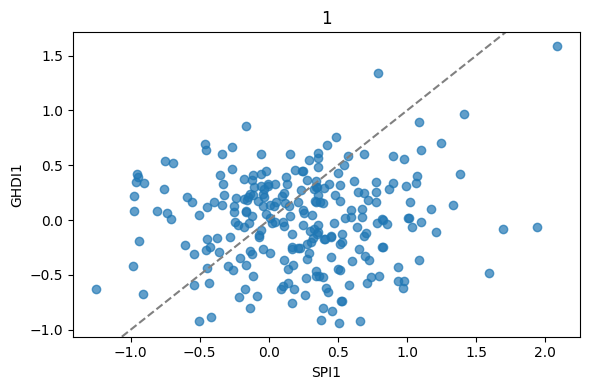

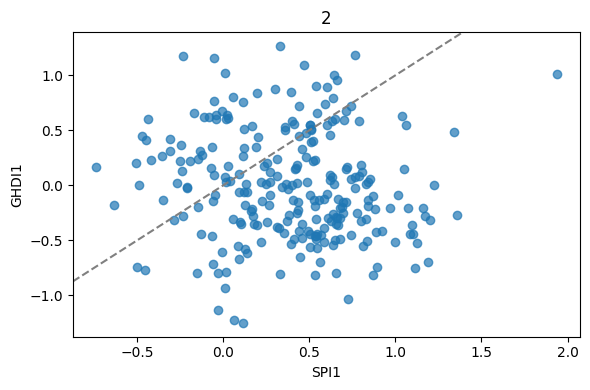

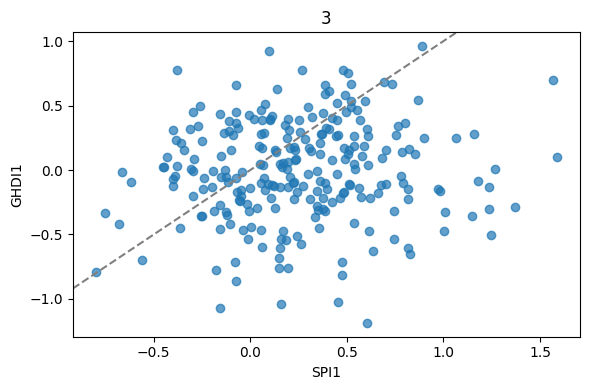

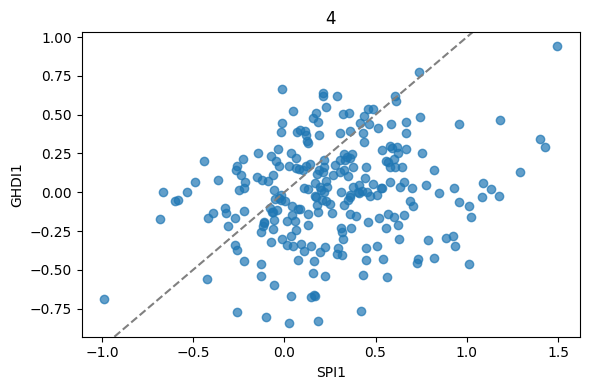

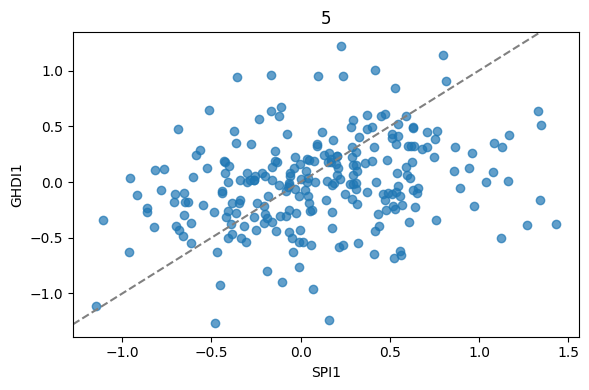

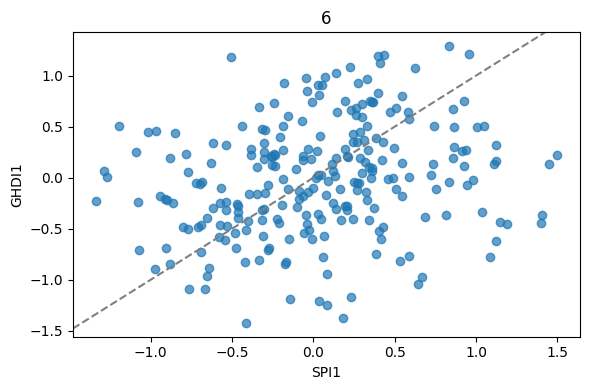

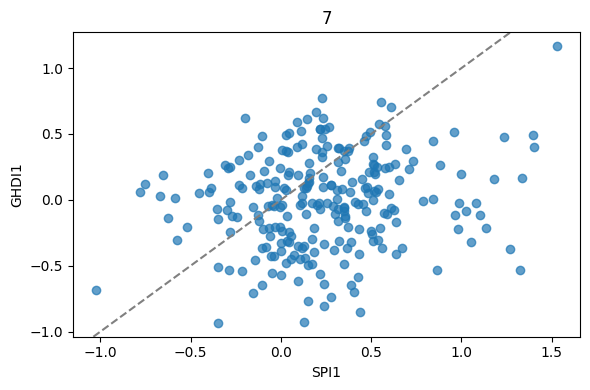

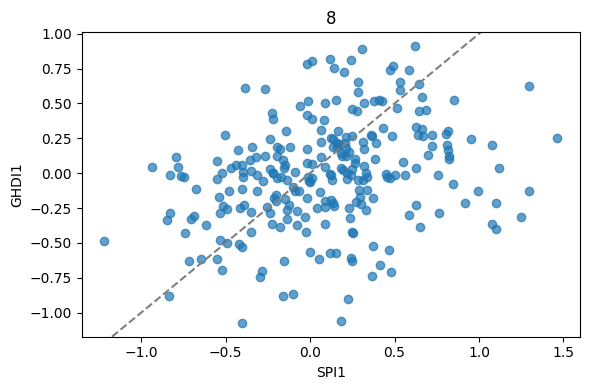

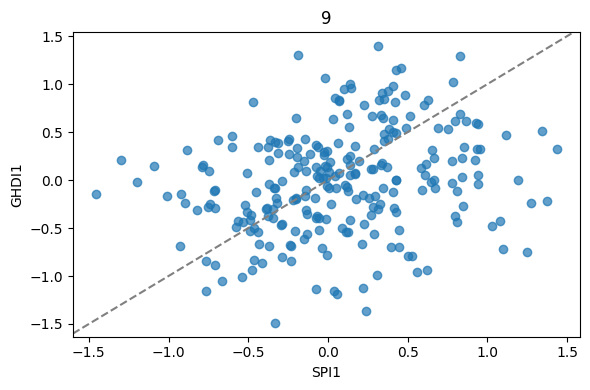

In [422]:
corr_result_1 = {}
for zone in range(0,9):
    corr = scatter_spatial_avg(one_month['ghdi'][zone], one_month['spi'][zone], zone=str(zone+1), timescale=1)
    corr_result_1[f'zone{zone+1}'] = corr

In [423]:
corr_result_1

{'zone1': (0.07799218584192148, 0.7038461140068808, -0.2162571824004437),
 'zone2': (-0.09392061592385373, 0.7806590085792551, -0.3877419976274059),
 'zone3': (0.08642801797907644, 0.6062384592658185, -0.2571286369646697),
 'zone4': (0.21897583690816802, 0.5244011995807537, -0.2665818425784303),
 'zone5': (0.2746043181699471, 0.5649016332980827, -0.10428772068771901),
 'zone6': (0.21698954268191503, 0.702275311649569, -0.03728876442758691),
 'zone7': (0.17182398926410844, 0.5518044963617188, -0.23937684759271077),
 'zone8': (0.29194723024259783, 0.520633879875463, -0.09936309929106556),
 'zone9': (0.23878873607842688, 0.6657223109069222, -0.07754130144968828)}

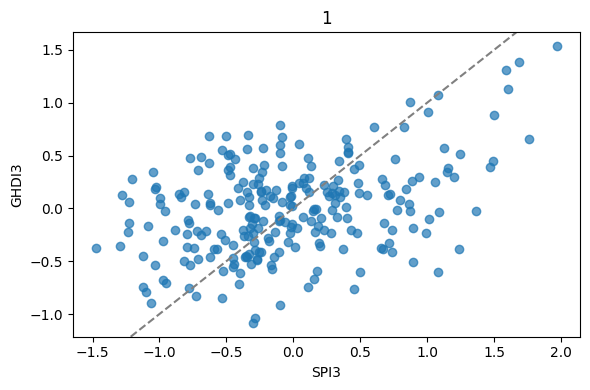

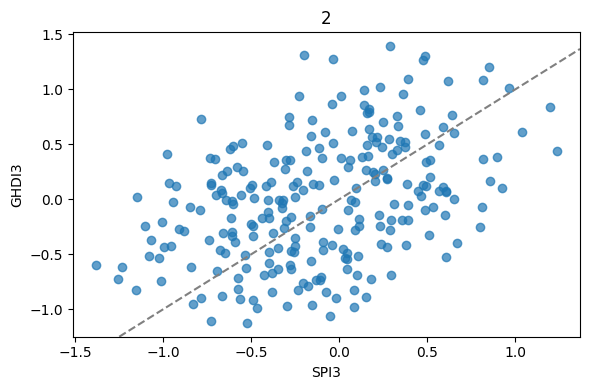

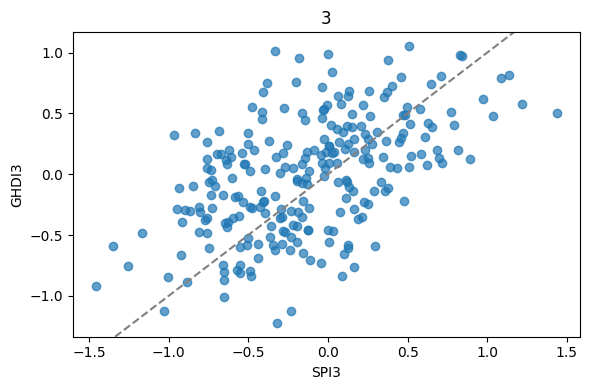

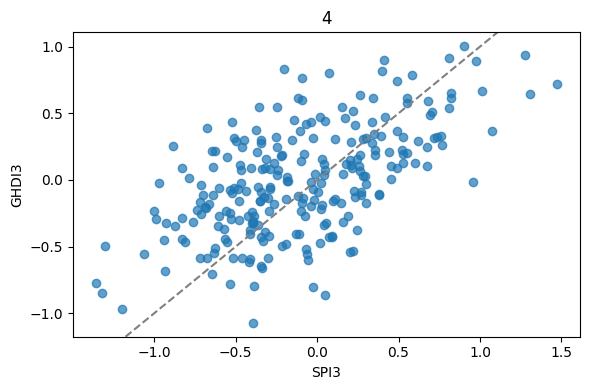

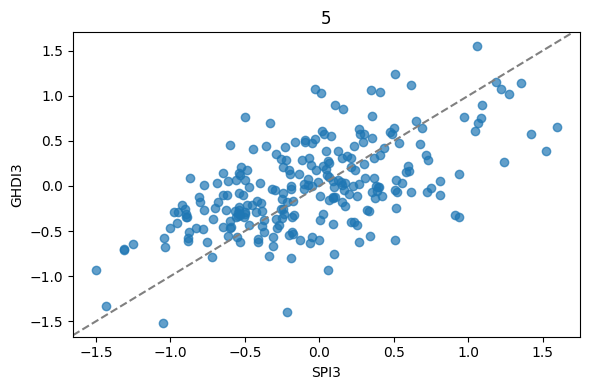

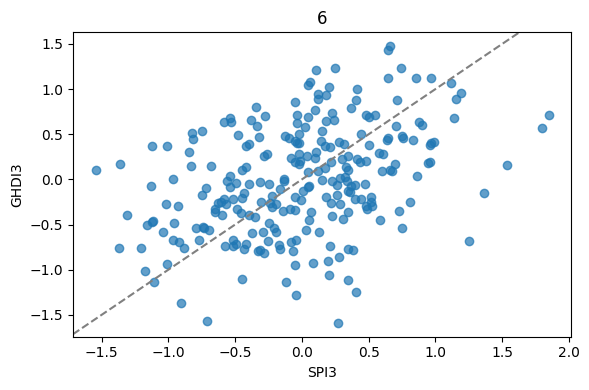

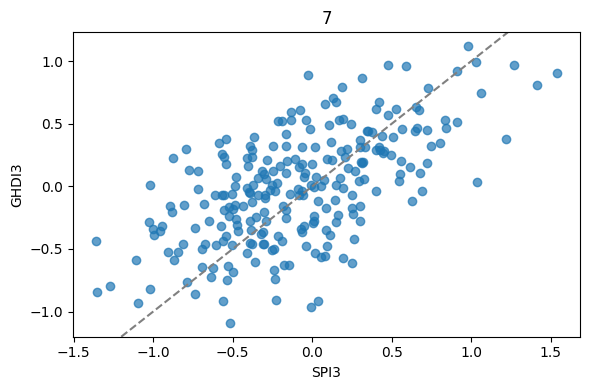

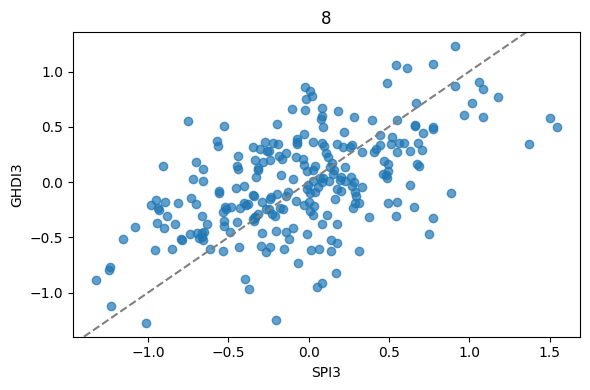

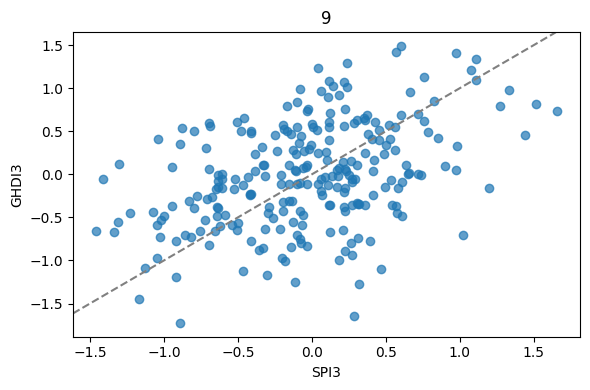

In [413]:
corr_result_3 = {}
for zone in range(0,9):
    corr = scatter_spatial_avg(three_month['ghdi'][zone], three_month['spi'][zone], zone=str(zone+1), timescale=3)
    corr_result_3[f'zone{zone+1}'] = corr

In [414]:
corr_result_3

{'zone1': (0.39888813056582584, 0.6362475919599904, 0.040175279141968605),
 'zone2': (0.4069914705461471, 0.5919150398261148, 0.10994659844085086),
 'zone3': (0.5225628071782465, 0.4933368941637431, 0.118289371258008),
 'zone4': (0.5851357543241559, 0.4355257631743647, 0.0972816548128857),
 'zone5': (0.5866695757908315, 0.49147983544645696, 0.05256640248350462),
 'zone6': (0.38370200381413905, 0.6675244767059849, 0.00895446521872454),
 'zone7': (0.6116073718516265, 0.4381541745653398, 0.08458512958483284),
 'zone8': (0.5491121497918421, 0.4713906665775534, 0.03618868350604235),
 'zone9': (0.41515172977362225, 0.6427074175066391, 0.031090300978623375)}

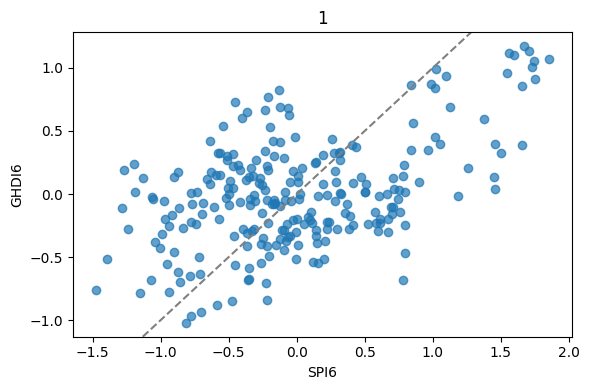

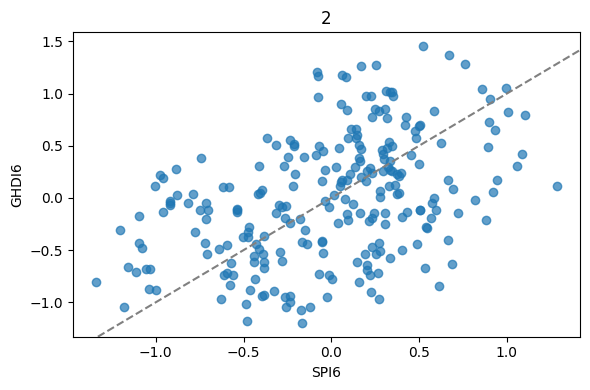

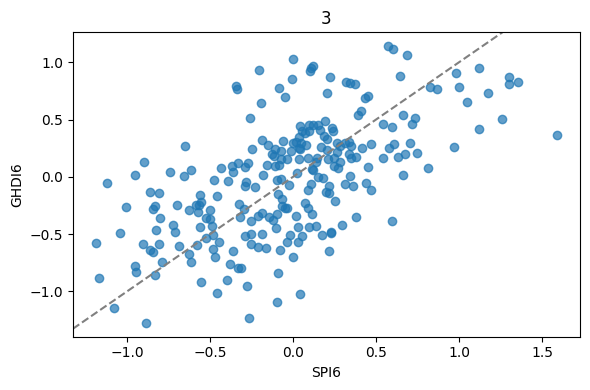

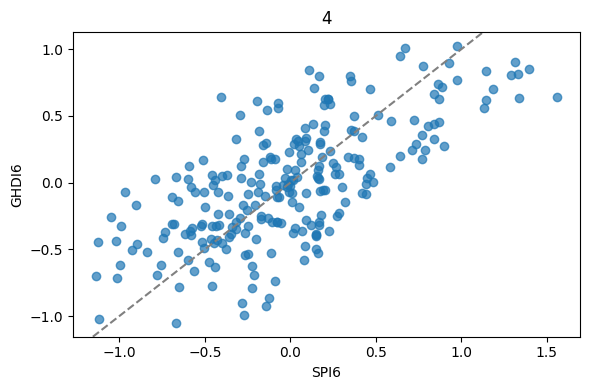

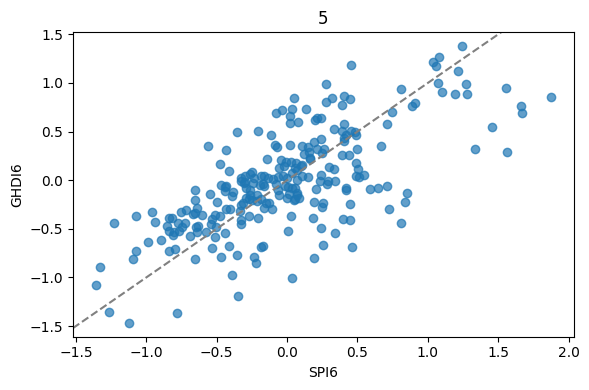

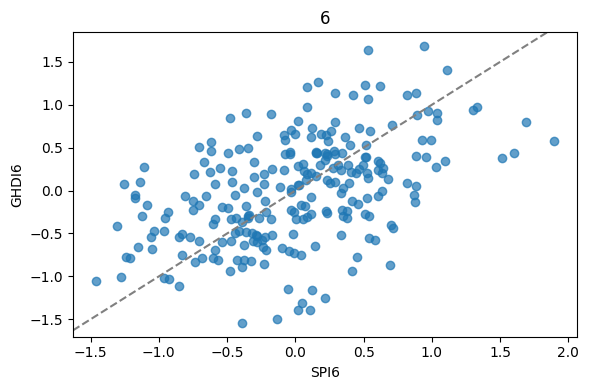

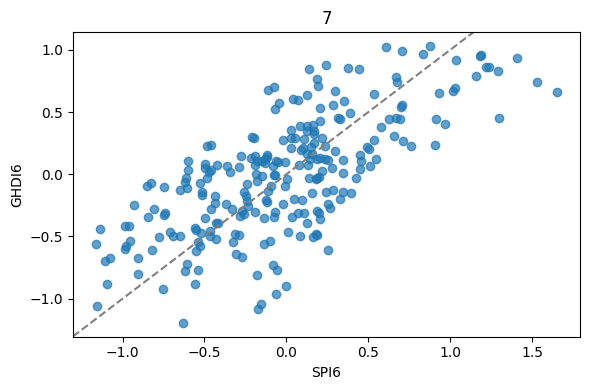

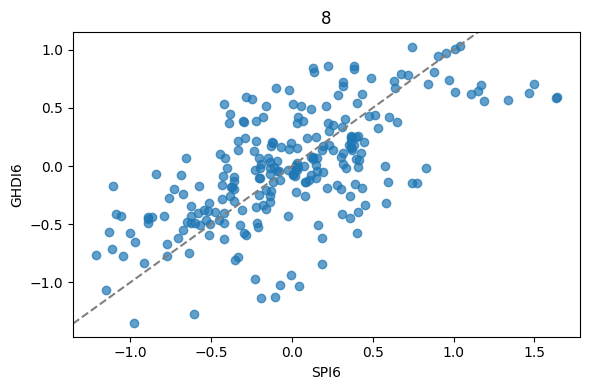

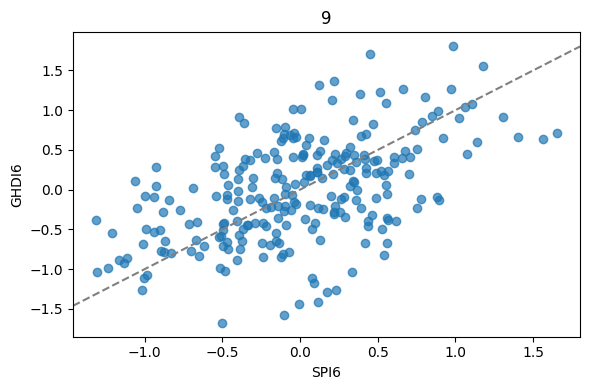

In [417]:
corr_result_6 = {}
for zone in range(0,9):
    corr = scatter_spatial_avg(six_month['ghdi'][zone], six_month['spi'][zone], zone=str(zone+1), timescale=6)
    corr_result_6[f'zone{zone+1}'] = corr

In [418]:
corr_result_6

{'zone1': (0.5049641908161667, 0.6140197449243572, 0.0028451409281225735),
 'zone2': (0.42916952618499205, 0.5998260052577312, 0.012367450314994921),
 'zone3': (0.6067766447639926, 0.45524343075920276, 0.019073824717498234),
 'zone4': (0.6887823750659376, 0.3898322861973202, 0.009238448744207725),
 'zone5': (0.6961600759646789, 0.43463099686365636, -0.0015612434008635673),
 'zone6': (0.47691390309684395, 0.6265217969136763, 0.0021467922635463083),
 'zone7': (0.7052616031910315, 0.3962044983244093, 0.01462948643873918),
 'zone8': (0.6457107900148465, 0.4311730501528969, -0.0065932477652068605),
 'zone9': (0.518256361967755, 0.5954955154009764, 0.003208018710487664)}

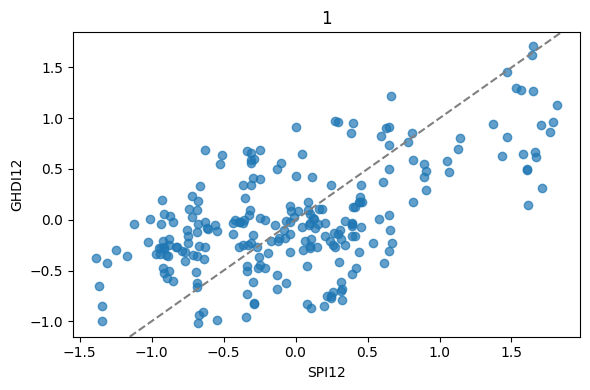

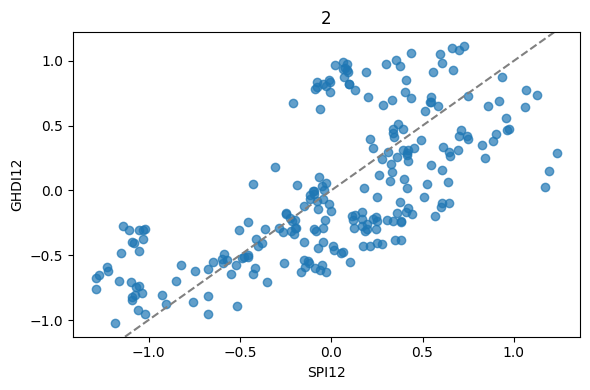

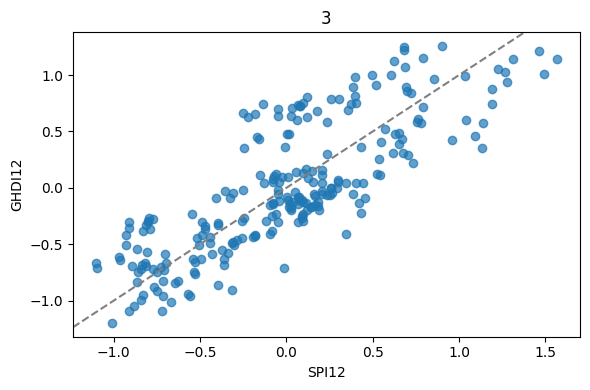

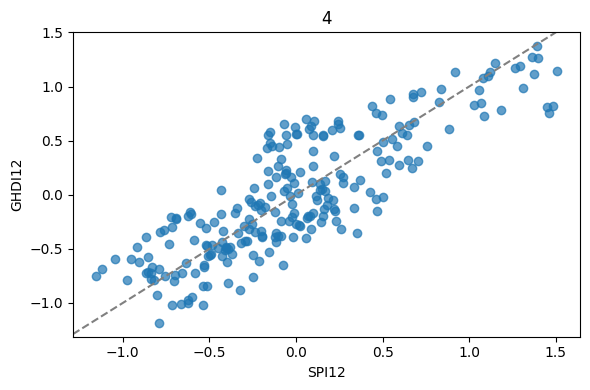

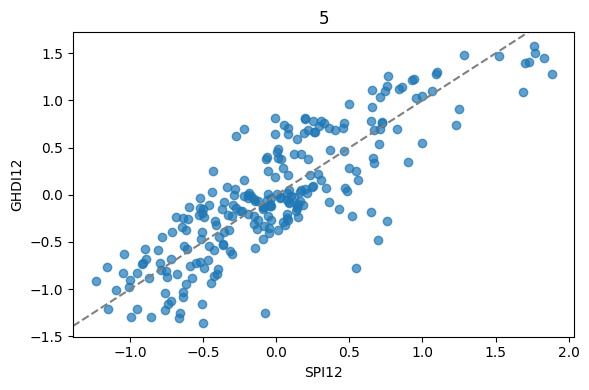

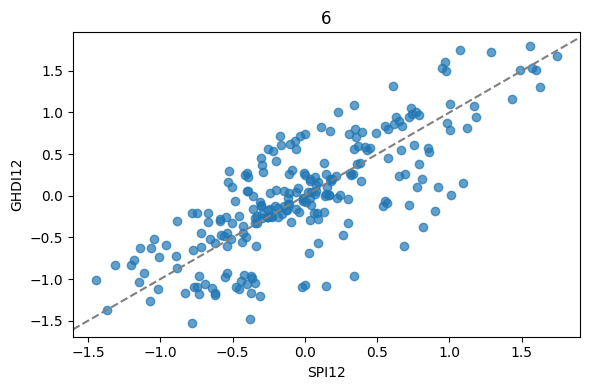

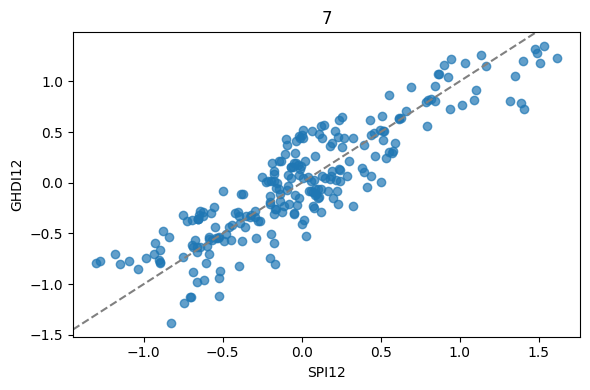

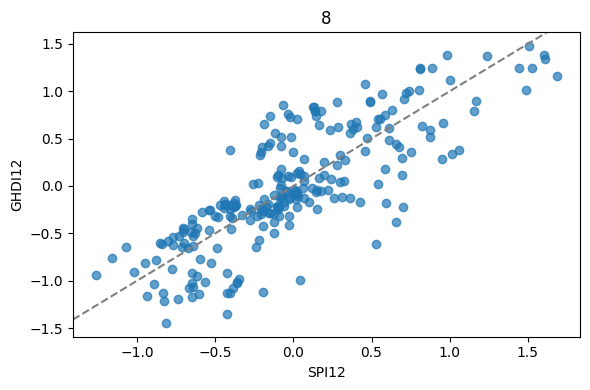

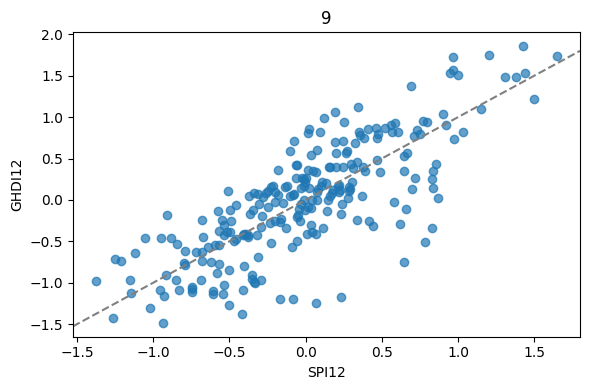

In [424]:
corr_result_12 = {}
for zone in range(0,9):
    corr = scatter_spatial_avg(twe_month['ghdi'][zone], twe_month['spi'][zone], zone=str(zone+1), timescale=12)
    corr_result_12[f'zone{zone+1}'] = corr

In [425]:
corr_result_12

{'zone1': (0.5862926494490822, 0.5997955954738341, 0.009767185916629806),
 'zone2': (0.6641678785184808, 0.4622824328678045, -0.009726881237714197),
 'zone3': (0.8101956195582453, 0.3538625815494899, 0.0019572047600869063),
 'zone4': (0.8439054326557419, 0.32020054001751247, 0.0037839593942561246),
 'zone5': (0.8429000468392632, 0.36538144285289803, -0.0026519629938232888),
 'zone6': (0.7723781201336727, 0.45010536081554514, 0.0059747154610022115),
 'zone7': (0.8916707097527753, 0.2683883947639928, 0.0073374303330664675),
 'zone8': (0.804435342463308, 0.3813726611846412, -0.006527302036622565),
 'zone9': (0.7882323664911012, 0.43037480098938574, 0.005963103450963334)}

In [441]:

corr_results = {
    '1-month': corr_result_1,
    '3-month': corr_result_3,
    '6-month': corr_result_6,
    '12-month': corr_result_12
}

# Build dataframe
rows = []
for ts, zones in corr_results.items():
    for zone, (r, rmse, bias) in zones.items():
        rows.append({
            'Timescale': ts,
            'Zone': zone,
            'Pearson r': round(r, 3),
            'RMSE': round(rmse, 3),
            'Bias': round(bias, 3)
        })

df_corr = pd.DataFrame(rows)
df_corr = df_corr.sort_values(by=['Timescale', 'Zone']).reset_index(drop=True)


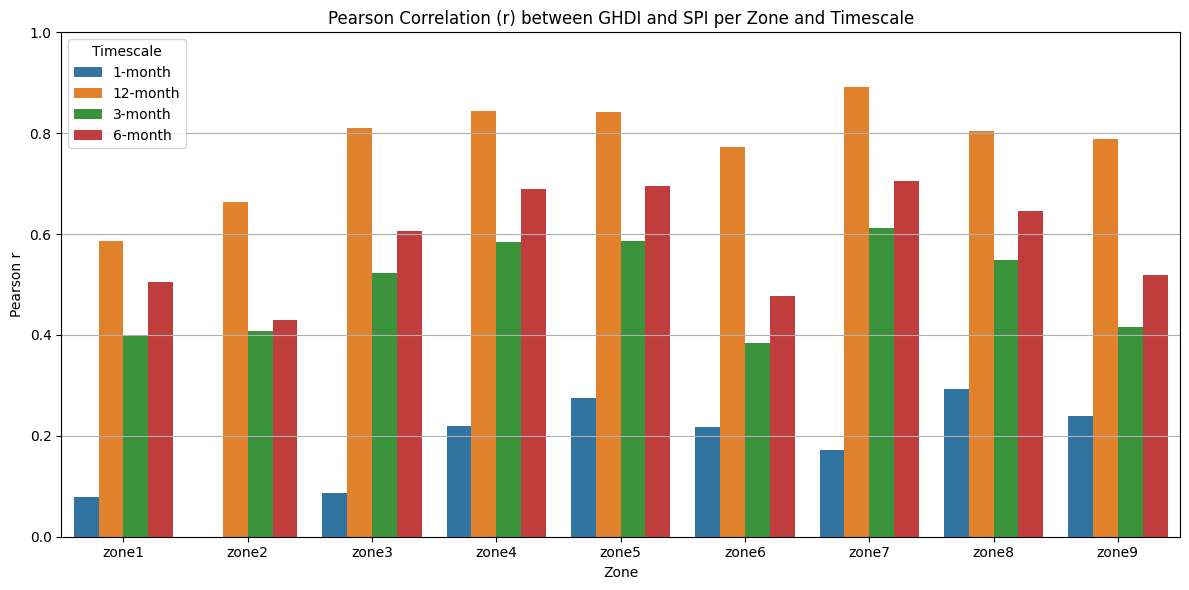

In [440]:
# Plot Pearson r
plt.figure(figsize=(12, 6))
sns.barplot(data=df_corr, x='Zone', y='Pearson r', hue='Timescale')
plt.title("Pearson Correlation (r) between GHDI and SPI per Zone and Timescale")
plt.ylabel("Pearson r")
plt.ylim(0, 1)  # Since r in [-1,1], but here your values are mostly > 0
plt.grid(True, axis='y')
plt.legend(title='Timescale')
plt.tight_layout()
plt.savefig("ghdi_spi_correlation_barplot.png", dpi=300)
plt.show()

#### ENSO

In [450]:
enso_df = pd.read_csv("oni_data.csv")

enso_df.columns = enso_df.columns.str.strip()

print(enso_df.columns)  # For debugging
season_to_month = {
    "DJF": 1, "JFM": 2, "FMA": 3, "MAM": 4,
    "AMJ": 5, "MJJ": 6, "JJA": 7, "JAS": 8,
    "ASO": 9, "SON": 10, "OND": 11, "NDJ": 12
}

Index(['Year', 'DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ', 'JJA', 'JAS', 'ASO',
       'SON', 'OND', 'NDJ'],
      dtype='object')


In [596]:
enso_34 = pd.read_csv("nina34.csv")
enso_34['nino34'] = enso_34['   Nino34 ']


In [452]:
df_melted = enso_df.melt(id_vars="Year", var_name="Season", value_name="ONI")

# Convert to datetime using the middle month of each season
def season_to_date(row):
    year = row["Year"]
    month = season_to_month[row["Season"]]
    if row["Season"] == "NDJ":
        year += 1
    return pd.Timestamp(year=year, month=month, day=15)

df_melted["Date"] = df_melted.apply(season_to_date, axis=1)
df_clean = df_melted.sort_values("Date").set_index("Date")[["ONI"]]

print(df_clean.head())

            ONI
Date           
2004-01-15  0.4
2004-02-15  0.3
2004-03-15  0.2
2004-04-15  0.2
2004-05-15  0.2


In [628]:
ghdi_1 = one_month['ghdi'][0].mean(dim=['y', 'x']).to_dataframe().reset_index()
ghdi_1.head()

,time,ghdi_30
0,2004-01-01,0.340233
1,2004-02-01,-0.065011
2,2004-03-01,-0.440726
3,2004-04-01,-0.059575
4,2004-05-01,-0.624665


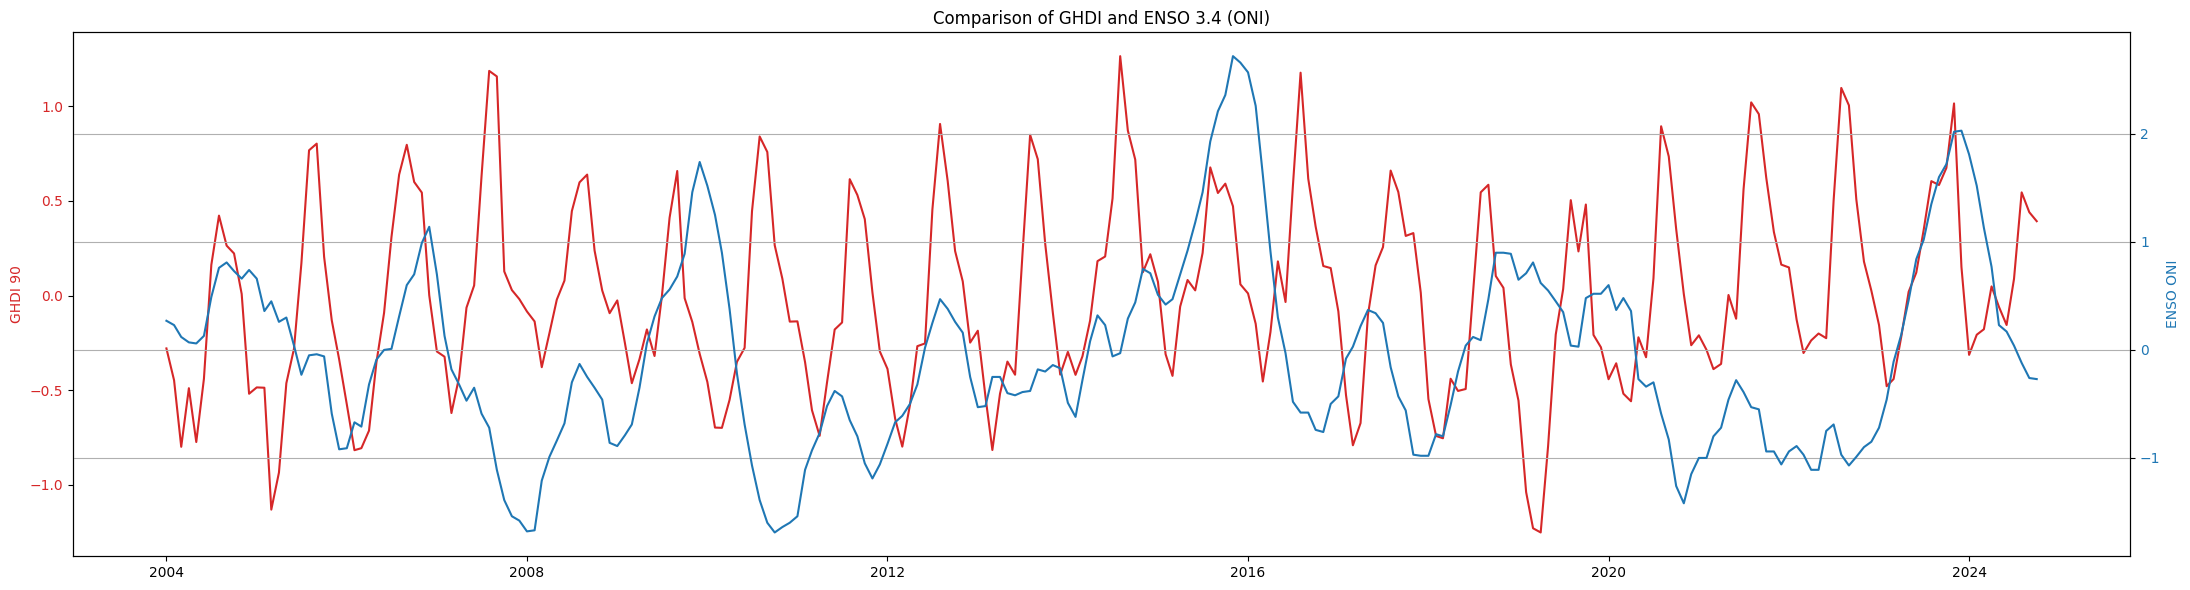

In [629]:
fig, ax1 = plt.subplots(figsize=(22,6))

# First axis → GHDI
ax1.plot(merged['time'], merged['ghdi_30'], color='tab:red', label='GHDI 90')
ax1.set_ylabel('GHDI 90', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Second axis → ENSO ONI
ax2 = ax1.twinx()
ax2.plot(merged['time'], merged['nino34'], color='tab:blue', label='ENSO ONI (3.4)')
ax2.set_ylabel('ENSO ONI', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Title and grid
plt.title('Comparison of GHDI and ENSO 3.4 (ONI)')
fig.tight_layout()
plt.grid(True)

In [630]:
# Convert to pandas with datetime index
enso_df = enso_34.reset_index()
index_df = ghdi_1

# MAking sure time columns are datetime
enso_df['time'] = pd.to_datetime(enso_df['Date'])
index_df['time'] = pd.to_datetime(index_df['time'])

# Enso uses 15th day so setting to 1st day to match GHDI
enso_df['time'] = enso_df['time'].dt.to_period('M').dt.to_timestamp(how='start')

# Merge on time
merged = pd.merge(index_df, enso_df, on='time', how='inner')

# Drop any missing values
merged = merged.dropna()

In [631]:
merged.head(5)

,time,ghdi_30,index,Date,Nino34,nino34
0,2004-01-01,0.340233,0,1/1/2004,0.27,0.27
1,2004-02-01,-0.065011,1,2/1/2004,0.23,0.23
2,2004-03-01,-0.440726,2,3/1/2004,0.12,0.12
3,2004-04-01,-0.059575,3,4/1/2004,0.07,0.07
4,2004-05-01,-0.624665,4,5/1/2004,0.06,0.06


In [632]:
# Basic correlation
corr, pval = pearsonr(merged['ghdi_30'], merged['nino34'])
print(f"Pearson correlation: {corr:.2f}, p-value: {pval:.4f}")

Pearson correlation: 0.03, p-value: 0.6074


In [627]:
merged['nino34'].shift(12).corr(merged['ghdi_30'])

0.03515179362365296

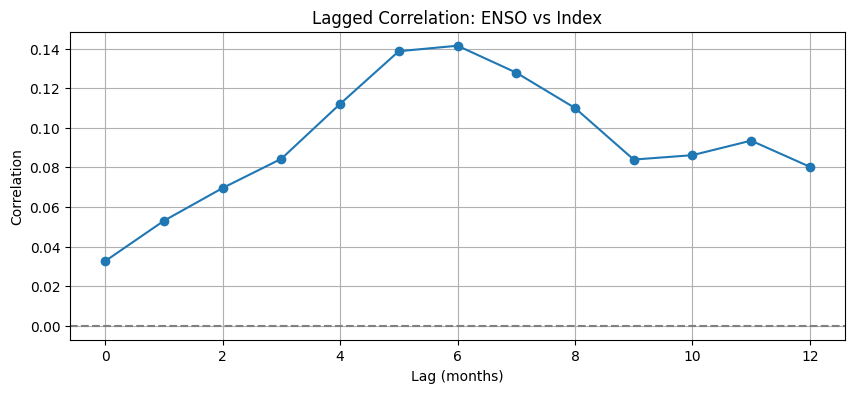

In [633]:
# Cross-correlation plot
lags = range(0, 13)
correlations = [merged['nino34'].shift(lag).corr(merged['ghdi_30']) for lag in lags]

plt.figure(figsize=(10, 4))
plt.plot(lags, correlations, marker='o')
plt.title('Lagged Correlation: ENSO vs Index')
plt.xlabel('Lag (months)')
plt.ylabel('Correlation')
plt.grid()
plt.axhline(0, color='gray', linestyle='--')
plt.show()

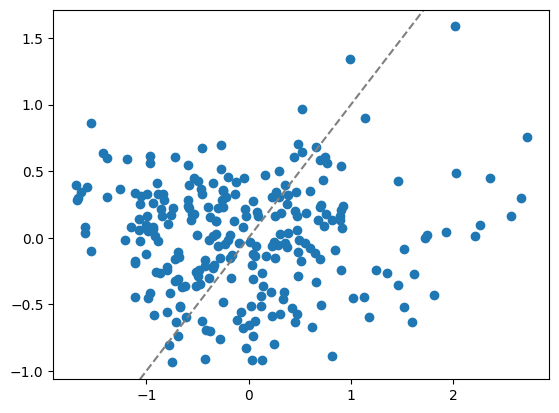

In [634]:
plt.scatter(merged['nino34'], merged['ghdi_30'])
plt.axline((0, 0), slope=1, linestyle='--', color='gray')  # 

In [643]:
from scipy.ndimage import label

#### Drought Characteristics

In [668]:
def extract_drought_events_table(series, threshold=-0.5):
    drought = (series < threshold).astype(int).values
    labeled, num_events = label(drought)

    events = []
    for i in range(1, num_events + 1):
        idx = np.where(labeled == i)[0]
        if len(idx) > 0:
            duration = len(idx)
            severity = series.iloc[idx].sum()
            intensity = severity / duration
            start_date = series.index[idx[0]]
            end_date = series.index[idx[-1]]
            events.append({
                'Start': start_date,
                'End': end_date,
                'Duration (months)': duration,
                'Severity': round(severity, 2),
                'Intensity': round(intensity, 2)
            })

    return pd.DataFrame(events)

In [679]:
drought_events_df = extract_drought_events_table(three_month['ghdi'][0].mean(dim=['y', 'x'], skipna= True).to_series())

In [680]:
drought_events_df

,Start,End,Duration (months),Severity,Intensity
0,2004-04-01,2004-07-01,4,-2.56,-0.64
1,2005-03-01,2005-04-01,2,-1.21,-0.60
2,2006-03-01,2006-04-01,2,-1.32,-0.66
3,2007-04-01,2007-04-01,1,-0.53,-0.53
4,2011-03-01,2011-09-01,7,-5.30,-0.76
5,2012-03-01,2012-04-01,2,-1.64,-0.82
6,2014-02-01,2014-03-01,2,-1.15,-0.57
7,2015-03-01,2015-03-01,1,-0.76,-0.76
8,2017-03-01,2017-05-01,3,-2.49,-0.83
9,2017-08-01,2017-08-01,1,-0.53,-0.53


In [681]:
def extract_drought_events(ts, threshold=-0.5, time_index=None):
    """
    ts: np.array or pd.Series (timeseries of index values)
    threshold: value below which drought is detected
    time_index: optional pd.DatetimeIndex to assign dates
    """
    below_thresh = ts < threshold
    event_ids = (below_thresh != below_thresh.shift()).cumsum() if isinstance(ts, pd.Series) else np.cumsum(np.insert(np.diff(below_thresh.astype(int)) != 0, 0, 0))
    
    drought_events = []
    in_event = False
    current_event = {}

    for i in range(len(ts)):
        if below_thresh[i]:
            if not in_event:
                # Start new event
                in_event = True
                current_event = {
                    'start_idx': i,
                    'values': [ts[i]]
                }
            else:
                # Continue event
                current_event['values'].append(ts[i])
        else:
            if in_event:
                # End current event
                in_event = False
                current_event['end_idx'] = i - 1
                current_event['duration'] = current_event['end_idx'] - current_event['start_idx'] + 1
                current_event['intensity'] = np.min(current_event['values'])
                current_event['severity'] = np.sum(current_event['values'])
                if time_index is not None:
                    current_event['start_date'] = time_index[current_event['start_idx']]
                    current_event['end_date'] = time_index[current_event['end_idx']]
                drought_events.append(current_event)
    
    # Edge case: drought ongoing at end of series
    if in_event:
        current_event['end_idx'] = len(ts) - 1
        current_event['duration'] = current_event['end_idx'] - current_event['start_idx'] + 1
        current_event['intensity'] = np.min(current_event['values'])
        current_event['severity'] = np.sum(current_event['values'])
        if time_index is not None:
            current_event['start_date'] = time_index[current_event['start_idx']]
            current_event['end_date'] = time_index[current_event['end_idx']]
        drought_events.append(current_event)

    return drought_events

In [686]:
# Example for 3-month timescale:
all_results = {}

for zone_idx in range(9):
    ts = pd.Series(three_month['ghdi'][zone_idx].mean(dim=['y', 'x'], skipna= True))  # convert to Series for convenience
    # Optional: add time index if you have it (e.g., pd.date_range)
    time_index = pd.date_range(start='2004-01-01', periods=len(ts), freq='M')
    ts.index = time_index
    
    events = extract_drought_events(ts, threshold=-0.5, time_index=time_index)
    all_results[f'zone_{zone_idx}'] = events

# Now you can access:
# all_results['zone_0'] → list of events for zone 0
# all_results['zone_1'] → list of events for zone 1
# etc.


In [687]:
all_results['zone_0'] 

[{'start_idx': 1,
  'values': [-0.5234647297347658,
   -0.5362584568955135,
   -0.7534666768467172,
   -0.7443998381510766],
  'end_idx': 4,
  'duration': 4,
  'intensity': -0.7534666768467172,
  'severity': -2.557589701628073,
  'start_date': Timestamp('2004-02-29 00:00:00', freq='M'),
  'end_date': Timestamp('2004-05-31 00:00:00', freq='M')},
 {'start_idx': 12,
  'values': [-0.5951896994590662, -0.6147963535181576],
  'end_idx': 13,
  'duration': 2,
  'intensity': -0.6147963535181576,
  'severity': -1.2099860529772237,
  'start_date': Timestamp('2005-01-31 00:00:00', freq='M'),
  'end_date': Timestamp('2005-02-28 00:00:00', freq='M')},
 {'start_idx': 24,
  'values': [-0.7187970264147715, -0.597998701614427],
  'end_idx': 25,
  'duration': 2,
  'intensity': -0.7187970264147715,
  'severity': -1.3167957280291986,
  'start_date': Timestamp('2006-01-31 00:00:00', freq='M'),
  'end_date': Timestamp('2006-02-28 00:00:00', freq='M')},
 {'start_idx': 37,
  'values': [-0.5250154413278576],
  

In [703]:
data_list = []

for zone_idx in range(3):
    events = all_results[f'zone_{zone_idx}']
    for ev in events:
        data_list.append({
            'zone': f'zone_{zone_idx+1}',
            'duration': ev['duration'],
            'severity': ev['severity'],
            'intensity': ev['intensity'],
            'timescale': '3-month'  # add this to compare timescales later
        })

df_events = pd.DataFrame(data_list)

In [704]:
df_events

,zone,duration,severity,intensity,timescale
0,zone_1,4,-2.557590,-0.753467,3-month
1,zone_1,2,-1.209986,-0.614796,3-month
2,zone_1,2,-1.316796,-0.718797,3-month
3,zone_1,1,-0.525015,-0.525015,3-month
4,zone_1,7,-5.301689,-1.041141,3-month
5,zone_1,2,-1.640596,-0.847471,3-month
6,zone_1,2,-1.148421,-0.592427,3-month
7,zone_1,1,-0.760185,-0.760185,3-month
8,zone_1,3,-2.490426,-1.083949,3-month
9,zone_1,1,-0.534139,-0.534139,3-month


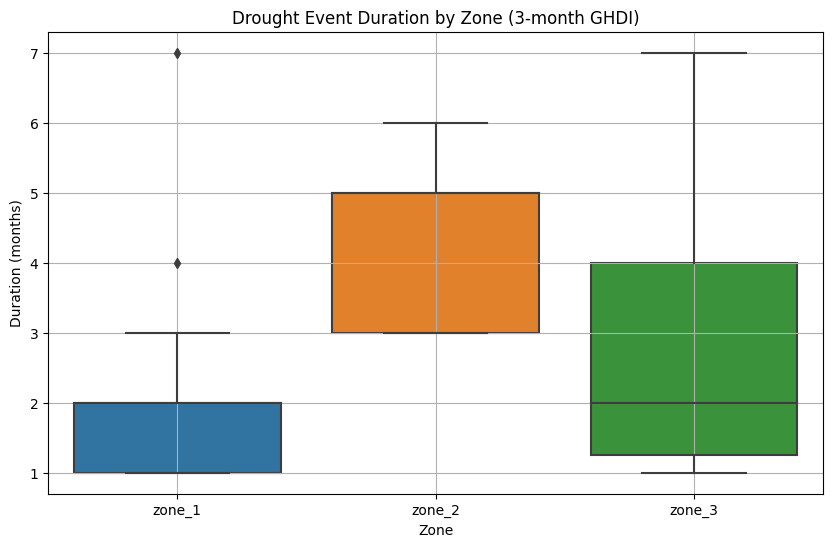

In [705]:
# Example boxplot: duration per zone
plt.figure(figsize=(10,6))
sns.boxplot(data=df_events, x='zone', y='duration')
plt.title('Drought Event Duration by Zone (3-month GHDI)')
plt.ylabel('Duration (months)')
plt.xlabel('Zone')
plt.grid(True)
plt.show()


In [694]:
df_events

,zone,duration,severity,intensity,timescale
0,zone_0,4,-2.557590,-0.753467,3-month
1,zone_0,2,-1.209986,-0.614796,3-month
2,zone_0,2,-1.316796,-0.718797,3-month
3,zone_0,1,-0.525015,-0.525015,3-month
4,zone_0,7,-5.301689,-1.041141,3-month
...,...,...,...,...,...
105,zone_8,2,-1.267648,-0.638861,3-month
106,zone_8,3,-2.462608,-1.117830,3-month
107,zone_8,4,-3.255546,-0.941554,3-month
108,zone_8,1,-0.794745,-0.794745,3-month


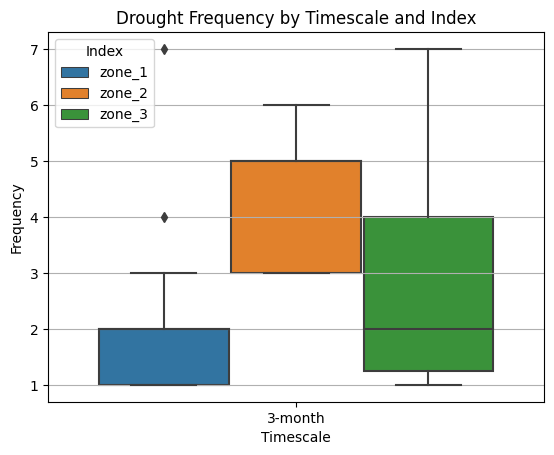

In [706]:
# Example: frequency boxplot
sns.boxplot(
    data=df_events, 
    x='timescale', 
    y='duration', 
    hue='zone'
)

plt.title('Drought Frequency by Timescale and Index')
plt.ylabel('Frequency')
plt.xlabel('Timescale')
plt.grid(True, axis='y')
plt.legend(title='Index')

plt.show()